In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread
from os import listdir
from keras.preprocessing.image import load_img, img_to_array
from numpy import asarray, savez_compressed, load
from collections import Counter
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
#Load the grid data generated from QGIS
data = pd.read_csv("C:/OSGeo4W64/bin/toronto_grid.csv")

#Change CSR from EPSG:3857 to EPSG:4326 to use in satellite imagery collection
from osgeo import osr
old_crs = osr.SpatialReference()
old_crs.ImportFromEPSG(3857)
new_crs = osr.SpatialReference()
new_crs.ImportFromEPSG(4326)
transform = osr.CoordinateTransformation(old_crs,new_crs)

#Convert south and west coordinates
west = []
south = []
for i in range(0,len(data)):
    q= data['bottom'][i]
    p = data['left'][i]
    result = transform.TransformPoint(p, q)
    west.append(result[0])
    south.append(result[1])

data['West']= west
data['South']= south

#Convert north and east coordinates
east = []
north = []
for i in range(0,len(data)):
    q= data['top'][i]
    p = data['right'][i]
    result = transform.TransformPoint(p, q)
    east.append(result[0])
    north.append(result[1])

data['East']= east
data['North']= north

In [ ]:
#Generate image files of satellite imagery dataset of the City of Toronto
for (i in c(1:nrow(data))){ 
a <- data[i,'id']
b <- ".png" 
GetBingMap(mapArea = c(data[i, 'South'], data[i, 'West'], data[i,'North'], data[i,'East']), size = c(256,256), destfile = paste0(a,b), maptype= "Aerial", RETURNIMAGE = FALSE, NEWMAP = TRUE, apiKey = c("Ai2GTE7keF_1T5KpTgkxqV3wmuAex8j8qzmsa1kcHC3ff5nYWNsudmxaOWBykR0W"))
}

In [ ]:
#Determining number of safety levels using KMeans
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('data_set.csv')

In [ ]:
#Total Road Accidents
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(data['total_acc'].values.reshape(-1,1))
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Visually determine optimal number of clusters based on chart above
k = 4
km = KMeans(n_clusters = k)
km.fit_predict(data['total_acc'].values.reshape(-1,1))
centers = km.cluster_centers_
#Number of accidents representing each cluster center
centers.round(2)

In [ ]:
#Total Road Safety Level Label
idx = np.argsort(centers.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(k)
total_label = lut[km.labels_]
data['total_label'] = total_label

In [ ]:
#Pedestrian Accidents
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(data['ped_acc'].values.reshape(-1,1))
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
k = 4
km = KMeans(n_clusters = k)
km.fit_predict(data['ped_acc'].values.reshape(-1,1))
centers = km.cluster_centers_
print(centers.round(2))
#Pedestrian Safety Level Label
idx = np.argsort(centers.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(k)
print(lut)
ped_label = lut[km.labels_]
data['ped_label'] = ped_label

In [ ]:
#Cyclist Accidents
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(data['cyc_acc'].values.reshape(-1,1))
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
k = 4
km = KMeans(n_clusters = k)
km.fit_predict(data['cyc_acc'].values.reshape(-1,1))
centers = km.cluster_centers_
print(centers.round(2))
#Cyclist Safety Level Label
idx = np.argsort(centers.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(k)
print(lut)
cyc_label = lut[km.labels_]
data['cyc_label'] = cyc_label

In [ ]:
#Save dataset
data.to_csv('data_set_labelled.csv')

In [2]:
data = pd.read_csv('data_set_labelled.csv')
folder = 'data/'
data.head()

,id,total_acc,cyc_acc,ped_acc,aerial,total_label,cyc_label,ped_label
0,35384,0,0,0,35384.png,0,0,0
1,100921,0,0,0,100921.png,0,0,0
2,35385,0,0,0,35385.png,0,0,0
3,100922,0,0,0,100922.png,0,0,0
4,35386,0,0,0,35386.png,0,0,0


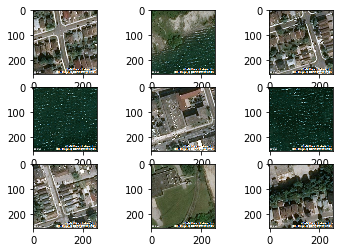

In [3]:
# plot the first 9 images in the dataset
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = folder + data['aerial'][i]
    image = imread(filename)
    pyplot.imshow(image)
pyplot.show()

In [3]:
#Function to map satellite imagery to safety level for specified safety group
def create_file_mapping(data, group):
    mapping = dict()
    for i in range(len(data)):
        image, safety_level = data['aerial'][i], data[group][i]
        mapping[image] = safety_level
    return mapping

#Function to load all images into memory
def load_dataset(path, file_mapping):
    photos, targets = list(), list()
    for filename in listdir(folder):
        #load image
        photo = load_img(path + filename, target_size=(128,128))
        #convert to numpy array
        photo = img_to_array(photo, dtype='uint8')
        target = file_mapping[filename]
        #store
        photos.append(photo)
        targets.append(target)
    X = asarray(photos, dtype='uint8')
    y = asarray(targets, dtype='uint8')
    return X, y

In [ ]:
#Generating total road accidents dataset

In [26]:
#Mapping total road accidents
total_map = create_file_mapping(data, 'total_label')
#loading total final labelled data set for total road accidents
X, y = load_dataset(folder, total_map)
print(X.shape, y.shape)

(57854, 128, 128, 3) (57854,)


In [27]:
Counter(y)

Counter({0: 54937, 1: 2049, 2: 732, 3: 136})

In [ ]:
#Save total road accident dataset
savez_compressed('total_acc.npz', X, y)

In [ ]:
#Generating pedestrian accidents dataset

In [4]:
#Mapping total road accidents
total_map = create_file_mapping(data, 'ped_label')
#loading total final labelled data set for total road accidents
X, y = load_dataset(folder, total_map)
print(X.shape, y.shape)
print(Counter(y))
#Save total road accident dataset
savez_compressed('ped_acc.npz', X, y)

(57854, 128, 128, 3) (57854,)
Counter({0: 56313, 1: 1089, 2: 391, 3: 61})


In [ ]:
#Generating cyclist accidents dataset

In [5]:
#Mapping total road accidents
total_map = create_file_mapping(data, 'cyc_label')
#loading total final labelled data set for total road accidents
X, y = load_dataset(folder, total_map)
print(X.shape, y.shape)
print(Counter(y))
#Save total road accident dataset
savez_compressed('cyc_acc.npz', X, y)

(57854, 128, 128, 3) (57854,)
Counter({0: 57353, 1: 326, 2: 138, 3: 37})
